In [16]:
import pandas as pd
import sqlite3

In [17]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
db_file = 'federalist.db'
# db_file = '../2019-02-21_Lab06/moby.db'
with sqlite3.connect(db_file) as db:
    tokens = pd.read_sql("SELECT * FROM token", db)
    dtm = pd.read_sql("SELECT * FROM dtm_tfidf", db)

In [29]:
labels = tokens.groupby(['chap_num']).token_str.apply(lambda x: ' '.join(x)[16:80]).tolist()

In [22]:
M = dtm.set_index(['chap_num', 'term_id']).term_weight.unstack()

In [32]:
E = pdist(M, metric='euclidean')

In [37]:
C = pdist(M, metric='cosine')

In [41]:
P = [(i,j) for i in M.index for j in M.index if j > i]

In [63]:
D = pd.DataFrame(dict(euclidean=E, cosine=C, pair=P))

In [64]:
D['i'] = D.apply(lambda x: x.pair[0], 1)
D['j'] = D.apply(lambda x: x.pair[1], 1)
D = D.set_index(['i', 'j'])
D = D.drop('pair', 1)

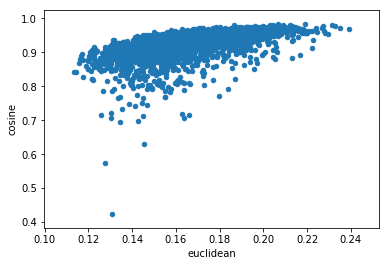

In [66]:
D.plot(kind='scatter', x='euclidean', y='cosine')

<Figure size 432x288 with 0 Axes>

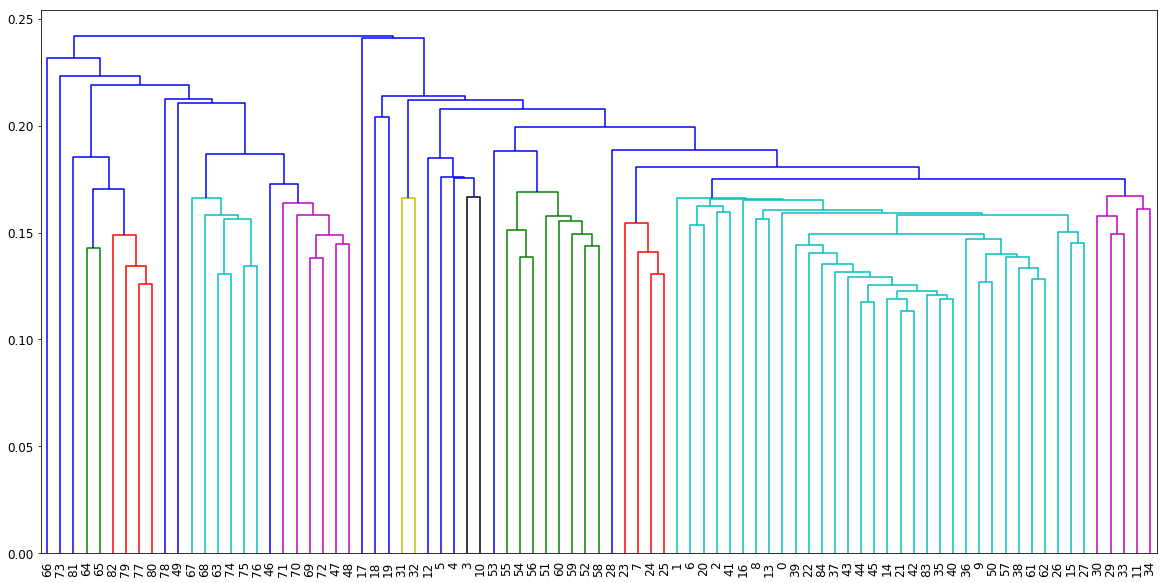

In [27]:
Z1 = sch.linkage(pdist(M, metric='euclidean'), method='ward')
plt.figure()
fig, axes = plt.subplots(figsize=(20, 10))
tree = sch.dendrogram(Z1)
plt.tick_params(axis='both', which='major', labelsize=12)

<Figure size 432x288 with 0 Axes>

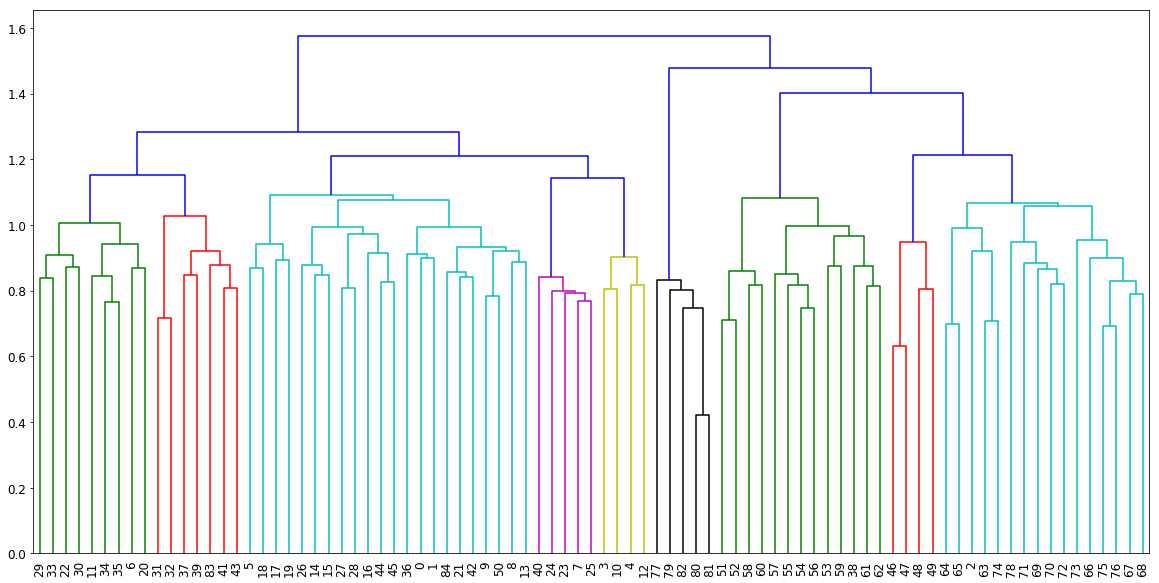

In [28]:
Z2 = sch.linkage(pdist(M, metric='cosine'), method='ward')
plt.figure()
fig, axes = plt.subplots(figsize=(20, 10))
tree = sch.dendrogram(Z2)
plt.tick_params(axis='both', which='major', labelsize=12)
# axes.set_xticklabels(labels)

In [31]:
for i, label in enumerate(labels):
    print(i, label)

0 1 General Introduction For the Independent Journal . Saturday , 
1 2 Concerning Dangers from Foreign Force and Influence For the In
2 3 The Same Subject Continued ( Concerning Dangers From Foreign F
3 4 The Same Subject Continued ( Concerning Dangers From Foreign F
4 5 The Same Subject Continued ( Concerning Dangers From Foreign F
5 6 Concerning Dangers from Dissensions Between the States For the
6 7 The Same Subject Continued ( Concerning Dangers from Dissensio
7 8 The Consequences of Hostilities Between the States From the Ne
8 9 The Union as a Safeguard Against Domestic Faction and Insurrec
9 10 The Same Subject Continued ( The Union as a Safeguard Against
10 11 The Utility of the Union in Respect to Commercial Relations a
11 12 The Utility of the Union In Respect to Revenue From the New Y
12 13 Advantage of the Union in Respect to Economy in Government Fo
13 14 Objections to the Proposed Constitution From Extent of Territ
14 15 The Insufficiency of the Present Confederation to Pr